In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
data = gpd.read_file("../data/afghanConflicts/afghanConflicts.shp")

In [3]:
# First, let's set max columns display for geopandas
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows', 100)

# Adding the plt parameters for charting size 
plt.rcParams['figure.figsize'] = (16, 12)

In [4]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28930 entries, 0 to 28929
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          28929 non-null  object  
 1   year        28930 non-null  object  
 2   active_yea  28929 non-null  object  
 3   start_year  28930 non-null  object  
 4   end_year    28930 non-null  object  
 5   type_of_vi  28929 non-null  object  
 6   conflict_n  28929 non-null  object  
 7   conflict_1  28929 non-null  object  
 8   dyad_new_i  28929 non-null  object  
 9   dyad_name   28929 non-null  object  
 10  side_a_new  28929 non-null  object  
 11  gwnoa       27591 non-null  object  
 12  side_a      28930 non-null  object  
 13  side_b_new  28929 non-null  object  
 14  gwnob       0 non-null      object  
 15  side_b      28930 non-null  object  
 16  number_of_  28929 non-null  object  
 17  source_art  28927 non-null  object  
 18  source_off  13069 non-null  object  
 

In [5]:
data.head(50)

,id,year,active_yea,start_year,end_year,type_of_vi,conflict_n,conflict_1,dyad_new_i,dyad_name,side_a_new,gwnoa,side_a,side_b_new,gwnob,side_b,number_of_,source_art,source_off,source_dat,source_hea,source_ori,where_prec,where_coor,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_g,country,country_id,iso3,region,event_clar,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civ,deaths_unk,low,best,high,geometry
0,None,#date+year,None,#date+year+start,#date+year+end,None,None,None,None,None,None,None,#group+name+first,None,None,#group+name+second,None,#meta+source,None,None,#description,None,None,#loc+name,#adm1+name,#adm2+name,#geo+lat,#geo+lon,None,None,#country+name,None,#country+code,#region+name,None,None,#date+start,#date+end,None,None,None,None,None,#affected+killed,None,POINT (0.000 0.000)
1,172881,2012,1,2012,2012,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,700.0,Government of Afghanistan,303,None,Taleban,-1,"Xinhua 13 April 2012 ""Afghan forces kill 25 Ta...",None,None,None,Officials /Taleban,3,Kamdesh district,Nuristan province,Kamdesh district,35.483273,71.314533,POINT (71.314533 35.483273),180503,Afghanistan,700,AFG,Asia,1,2,2012-04-11,2012-04-13,0,8,0,17,25,25,25,POINT (71.315 35.483)
2,174838,2012,1,2012,2012,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,700.0,Government of Afghanistan,303,None,Taleban,-1,"Xinhua 15 Sep 2012 ""13 militants killed in eas...",None,None,None,Police,2,Yahya Khel district,Paktika province,Yahya Khel district,32.924506,68.660065,POINT (68.660065 32.924506),176898,Afghanistan,700,AFG,Asia,1,2,2012-09-14,2012-09-15,0,6,0,0,6,6,6,POINT (68.660 32.925)
3,175056,2012,1,2012,2012,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,700.0,Government of Afghanistan,303,None,Taleban,-1,"Voice of Jihad website, in Pashto 30 Sep 12 (B...",None,None,None,Taleban,3,Du Layna district,Ghor province,Du Layna district,34.134555,64.996159,POINT (64.996159 34.134555),179050,Afghanistan,700,AFG,Asia,1,2,2012-09-27,2012-09-30,0,11,0,0,11,11,11,POINT (64.996 34.135)
4,175289,2012,1,2012,2012,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,700.0,Government of Afghanistan,303,None,Taleban,-1,"Xinhua 16 Oct 2012 ""Xinhua Asia-Pacific news s...",None,None,None,Military spokesman,1,Sanginaka village,Ghazni province,Andar district,33.2569,68.4762,POINT (68.476200 33.256900),177617,Afghanistan,700,AFG,Asia,1,2,2012-10-15,2012-10-16,0,9,0,0,9,9,9,POINT (68.476 33.257)
5,175290,2012,1,2012,2012,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,700.0,Government of Afghanistan,303,None,Taleban,-1,"Xinhua 16 Oct 2012 ""Xinhua Asia-Pacific news s...",None,None,None,Military spokesman,1,Nazarwal village,Ghazni province,Andar district,33.255196,68.411095,POINT (68.411095 33.255196),177617,Afghanistan,700,AFG,Asia,1,2,2012-10-15,2012-10-16,0,8,0,0,8,8,8,POINT (68.411 33.255)
6,79307,2013,1,2013,2013,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,700.0,Government of Afghanistan,303,None,Taleban,-1,Voice of Jihad website in Pashto 24 May 13 (BB...,None,None,None,Police/Taleban,1,Bashanabad village,Badakhshan province,Warduj district,36.78581,71.094112,POINT (71.094112 36.785810),182663,Afghanistan,700,AFG,Asia,1,2,2013-05-23,2013-05-24,1,5,0,0,2,6,6,POINT (71.094 36.786)
7,81611,2013,1,2013,2013,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,700.0,Government of Afghanistan,303,None,Taleban,-1,"Xinhua 16 Dec 2013 ""10 militants killed in Afg...",None,None,None,Military,1,Gadwar Kalay village,Ghazni province,Andar district,33.303997,68.291191,POINT (68.291191 33.303997),177617,Afghanistan,700,AFG,Asia,1,2,2013-12-15,2013-12-16,0,10,0,0,10,10,10,POINT (68.291 33.304)
8,144126,2014,1,2014,2014,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,700.0,Government of Afghanistan,303,None,Taleban,1,"""BBC Monitoring South Asia,201

In [6]:
data.dyad_name.value_counts()

Government of Afghanistan - Taleban                                                                 24077
Government of Afghanistan - IS                                                                       1289
Taleban - Civilians                                                                                   922
Government of Afghanistan - UIFSA                                                                     911
Government of Afghanistan - Hizb-i Islami-yi Afghanistan                                              302
Government of Afghanistan - Junbish-i Milli-yi Islami                                                 254
Government of United States of America - al-Qaida                                                     202
Government of Afghanistan - Hizb-i Islami-yi Afghanistan - Khalis faction                             138
Government of Afghanistan - Civilians                                                                 138
IS - Taleban                                  

In [7]:
data.dtypes

id              object
year            object
active_yea      object
start_year      object
end_year        object
type_of_vi      object
conflict_n      object
conflict_1      object
dyad_new_i      object
dyad_name       object
side_a_new      object
gwnoa           object
side_a          object
side_b_new      object
gwnob           object
side_b          object
number_of_      object
source_art      object
source_off      object
source_dat      object
source_hea      object
source_ori      object
where_prec      object
where_coor      object
adm_1           object
adm_2           object
latitude        object
longitude       object
geom_wkt        object
priogrid_g      object
country         object
country_id      object
iso3            object
region          object
event_clar      object
date_prec       object
date_start      object
date_end        object
deaths_a        object
deaths_b        object
deaths_civ      object
deaths_unk      object
low             object
best       

In [8]:
data_clean = data[['id', 'year', 'type_of_vi', 'source_art', 'conflict_n', 'source_dat', 'side_a', 'side_b', 'adm_2', 'latitude', 'longitude', 'date_start', 'date_end', 'deaths_a', 'deaths_b', 'geometry' ]]

In [9]:
data_clean.head()

,id,year,type_of_vi,source_art,conflict_n,source_dat,side_a,side_b,adm_2,latitude,longitude,date_start,date_end,deaths_a,deaths_b,geometry
0,None,#date+year,None,#meta+source,None,None,#group+name+first,#group+name+second,#adm2+name,#geo+lat,#geo+lon,#date+start,#date+end,None,None,POINT (0.000 0.000)
1,172881,2012,1,"Xinhua 13 April 2012 ""Afghan forces kill 25 Ta...",333,None,Government of Afghanistan,Taleban,Kamdesh district,35.483273,71.314533,2012-04-11,2012-04-13,0,8,POINT (71.315 35.483)
2,174838,2012,1,"Xinhua 15 Sep 2012 ""13 militants killed in eas...",333,None,Government of Afghanistan,Taleban,Yahya Khel district,32.924506,68.660065,2012-09-14,2012-09-15,0,6,POINT (68.660 32.925)
3,175056,2012,1,"Voice of Jihad website, in Pashto 30 Sep 12 (B...",333,None,Government of Afghanistan,Taleban,Du Layna district,34.134555,64.996159,2012-09-27,2012-09-30,0,11,POINT (64.996 34.135)
4,175289,2012,1,"Xinhua 16 Oct 2012 ""Xinhua Asia-Pacific news s...",333,None,Government of Afghanistan,Taleban,Andar district,33.2569,68.4762,2012-10-15,2012-10-16,0,9,POINT (68.476 33.257)


In [10]:
data_clean.year.value_counts()

2018          3722
2017          2480
2016          2424
2012          2305
2015          2264
2011          2197
2014          2119
2013          1926
2010          1806
2009          1514
2008          1114
2007          1042
2006           848
2005           430
2001           263
1994           244
2004           241
1996           234
1995           219
1998           217
2000           207
1997           199
1999           189
2003           186
1989           145
1993           115
2002            94
1992            76
1991            64
1990            45
#date+year       1
Name: year, dtype: int64

In [11]:
data_clean.year.value_counts()

2018          3722
2017          2480
2016          2424
2012          2305
2015          2264
2011          2197
2014          2119
2013          1926
2010          1806
2009          1514
2008          1114
2007          1042
2006           848
2005           430
2001           263
1994           244
2004           241
1996           234
1995           219
1998           217
2000           207
1997           199
1999           189
2003           186
1989           145
1993           115
2002            94
1992            76
1991            64
1990            45
#date+year       1
Name: year, dtype: int64

In [12]:
data_clean2 = data_clean.loc[data_clean['year'].isin(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])]

In [13]:
data_clean2.head(100)

,id,year,type_of_vi,source_art,conflict_n,source_dat,side_a,side_b,adm_2,latitude,longitude,date_start,date_end,deaths_a,deaths_b,geometry
1,172881,2012,1,"Xinhua 13 April 2012 ""Afghan forces kill 25 Ta...",333,None,Government of Afghanistan,Taleban,Kamdesh district,35.483273,71.314533,2012-04-11,2012-04-13,0,8,POINT (71.315 35.483)
2,174838,2012,1,"Xinhua 15 Sep 2012 ""13 militants killed in eas...",333,None,Government of Afghanistan,Taleban,Yahya Khel district,32.924506,68.660065,2012-09-14,2012-09-15,0,6,POINT (68.660 32.925)
3,175056,2012,1,"Voice of Jihad website, in Pashto 30 Sep 12 (B...",333,None,Government of Afghanistan,Taleban,Du Layna district,34.134555,64.996159,2012-09-27,2012-09-30,0,11,POINT (64.996 34.135)
4,175289,2012,1,"Xinhua 16 Oct 2012 ""Xinhua Asia-Pacific news s...",333,None,Government of Afghanistan,Taleban,Andar district,33.2569,68.4762,2012-10-15,2012-10-16,0,9,POINT (68.476 33.257)
5,175290,2012,1,"Xinhua 16 Oct 2012 ""Xinhua Asia-Pacific news s...",333,None,Government of Afghanistan,Taleban,Andar district,33.255196,68.411095,2012-10-15,2012-10-16,0,8,POINT (68.411 33.255)
6,79307,2013,1,Voice of Jihad website in Pashto 24 May 13 (BB...,333,None,Government of Afghanistan,Taleban,Warduj district,36.78581,71.094112,2013-05-23,2013-05-24,1,5,POINT (71.094 36.786)
7,81611,2013,1,"Xinhua 16 Dec 2013 ""10 militants killed in Afg...",333,None,Government of Afghanistan,Taleban,Andar district,33.303997,68.291191,2013-12-15,2013-12-16,0,10,POINT (68.291 33.304)
8,144126,2014,1,"""BBC Monitoring South Asia,2014-02-16,Thirteen...",333,2014-02-16,Government of Afghanistan,Taleban,Bati Kot district,34.290316,70.761085,2014-02-15,2014-02-16,0,13,POINT (70.761 34.290)
9,174941,2012,1,Pakistan Timeline 2012,333,None,Government of Afghanistan,Taleban,None,33.0,65.0,2012-09-22,2012-09-22,0,3,POINT (65.000 33.000)
10,81538,2013,1,"Xinhua 8 Dec 2013 ""Afghan police kill 7 Taliba...",333,None,Government of Afghanistan,Taleban,None,34.0,69.25,2013-12-07,2013-12-08,0,2,POINT (69.250 34.000)


In [14]:
data_clean2.shape

(26975, 16)

In [15]:
data_clean2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 26975 entries, 1 to 28929
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          26975 non-null  object  
 1   year        26975 non-null  object  
 2   type_of_vi  26975 non-null  object  
 3   source_art  26975 non-null  object  
 4   conflict_n  26975 non-null  object  
 5   source_dat  13041 non-null  object  
 6   side_a      26975 non-null  object  
 7   side_b      26975 non-null  object  
 8   adm_2       20265 non-null  object  
 9   latitude    26975 non-null  object  
 10  longitude   26975 non-null  object  
 11  date_start  26975 non-null  object  
 12  date_end    26975 non-null  object  
 13  deaths_a    26975 non-null  object  
 14  deaths_b    26975 non-null  object  
 15  geometry    26975 non-null  geometry
dtypes: geometry(1), object(15)
memory usage: 3.5+ MB


<AxesSubplot:>

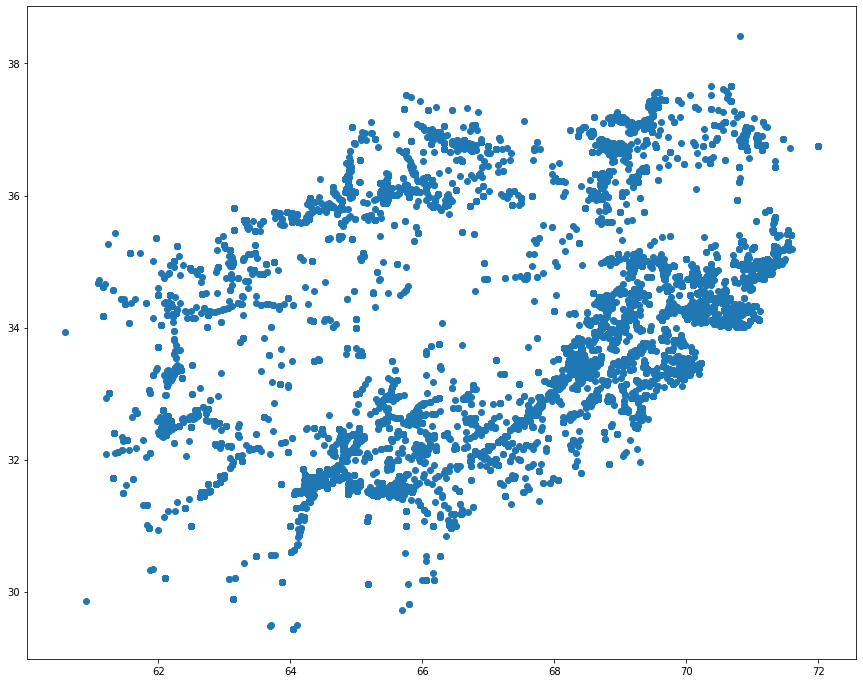

In [16]:
data_clean2.plot()

In [17]:
data_clean2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 26975 entries, 1 to 28929
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          26975 non-null  object  
 1   year        26975 non-null  object  
 2   type_of_vi  26975 non-null  object  
 3   source_art  26975 non-null  object  
 4   conflict_n  26975 non-null  object  
 5   source_dat  13041 non-null  object  
 6   side_a      26975 non-null  object  
 7   side_b      26975 non-null  object  
 8   adm_2       20265 non-null  object  
 9   latitude    26975 non-null  object  
 10  longitude   26975 non-null  object  
 11  date_start  26975 non-null  object  
 12  date_end    26975 non-null  object  
 13  deaths_a    26975 non-null  object  
 14  deaths_b    26975 non-null  object  
 15  geometry    26975 non-null  geometry
dtypes: geometry(1), object(15)
memory usage: 3.5+ MB


In [26]:
data_clean2.to_file('../data/clean_data/clean_conflicts.shp', driver='ESRI Shapefile')